In [1]:
%load_ext autoreload
%autoreload 2

- [Element Picker](#Element-Picker)
- [Gaussian Smoothing Picker](#Gaussian-Smoothing-Picker)
- [Von Mises](#Von-Mises-Stress-Condition)
- [Von Mises Result](#Von-Mises-Result)
- [Circle](#Circle-Stress-Condition)
- [Circle Result](#Circle-Result)

In [2]:
import struct_opt.material_opt as material_opt
import struct_opt.visual as visual
from struct_opt.environment_setup import get_element_index_matrix

import numpy as np
from IPython.display import HTML
import matplotlib.pyplot as plt


Element Picker
---

elements are indexed in the following manner

| 1 | 5 | 9  | 13 |
|---|---|----|----|
| 2 | 6 | 10 | 14 |
| 3 | 7 | 11 | 15 |
| 4 | 8 | 12 | 16 |

visualize elements using function below

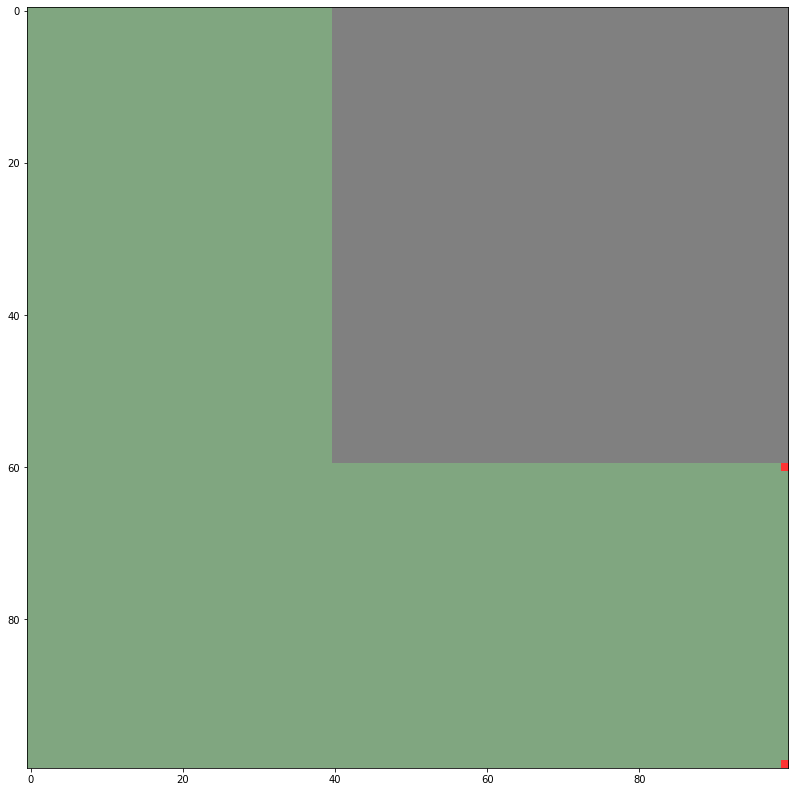

In [3]:
problem_size = 20

elements = [16 * np.square(problem_size) - problem_size * 2, 6399]
element_index_matrix = get_element_index_matrix(problem_size)


visual.highlight_elements(element_index_matrix, elements)

Gaussian Smoothing Picker
---

Use this to check how the mass is spread out for different value of the variance and width of some element

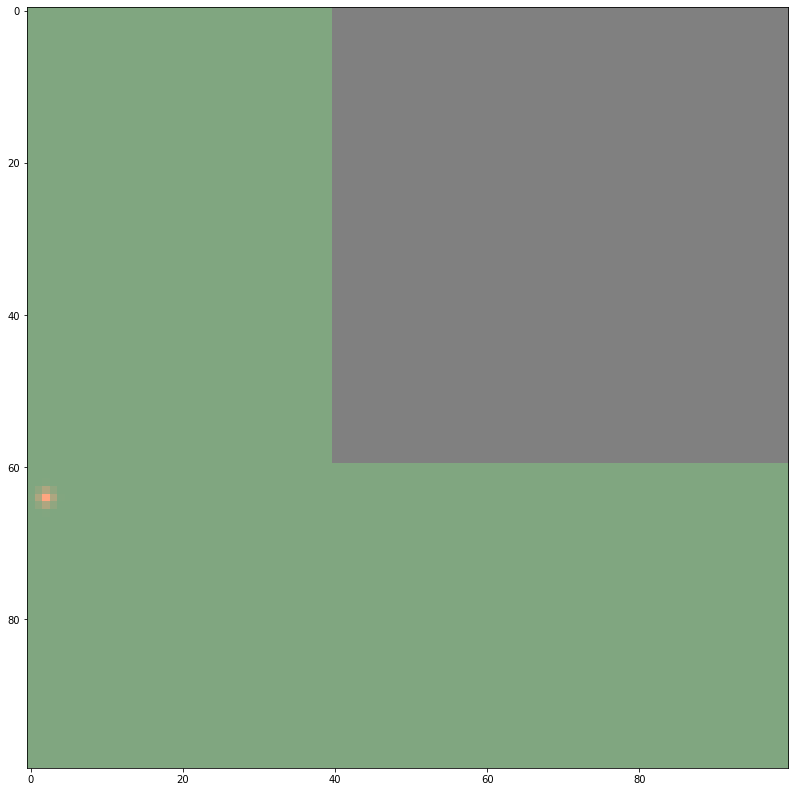

In [5]:
visual.highlight_gaussian_smoothing(element_index_matrix, element=264, variance=1.0, width=3.0)

Von Mises Stress Condition
---

In [7]:

problem_size = 20
material_opt.main(
    problem_size=problem_size,
    elements=np.array([
        16 * np.square(problem_size) - problem_size * 2
    ]),
    directions=np.array([
        1
    ]),
    amplitudes=np.array([
        -1
    ]),
    max_constraint=6500,
    
    mode="von mises",
    
    smoothing_mode="gaussian", #gaussian or none
    smoothing_width=3.0,
    variance=1.0,
    
    penalty_mode="entropy", # entropy or none
    penalty_epochs=500, # Last x epochs uses penalty
    penalty_size=0.8,
    
    thickness=0.02,
    poisson_ratio=0.3,
    initial_value_design=2.0,
    elasticity_module=1000,
    
    barrier_size=2200,
    barrier_width=4500,
    
    epochs=1000,
    learning_rate=0.05,
    
    data_directory="data"
)


Initializing env: 0.3173646926879883 seconds
Instructions for updating:
Use tf.identity instead.
0: O: 5670.314453125 W: 5637.1005859375 C 4332.96435546875 -- T: 3.7396950721740723
1: O: 5617.0498046875 W: 5610.35498046875 C 4306.6845703125 -- T: 2.9708986282348633
2: O: 5547.3173828125 W: 5582.27099609375 C 4264.76708984375 -- T: 2.9782261848449707
3: O: 5506.6337890625 W: 5552.65576171875 C 4253.4931640625 -- T: 2.9623615741729736
4: O: 5446.4423828125 W: 5521.55908203125 C 4223.5859375 -- T: 2.97691011428833
5: O: 5383.2802734375 W: 5488.91552734375 C 4191.78759765625 -- T: 2.990344524383545
6: O: 5324.1533203125 W: 5454.69482421875 C 4165.5078125 -- T: 2.990060567855835
7: O: 5265.17333984375 W: 5418.86376953125 C 4140.81396484375 -- T: 3.004152774810791
8: O: 5201.2509765625 W: 5381.3818359375 C 4112.28955078125 -- T: 2.989471197128296
9: O: 5150.8564453125 W: 5342.185546875 C 4100.1044921875 -- T: 2.975553512573242
10: O: 5095.12451171875 W: 5301.8740234375 C 4083.223876953125 --

91: O: 1688.8626708984375 W: 1986.734619140625 C 3981.02099609375 -- T: 2.9802913665771484
92: O: 1688.375 W: 1983.84814453125 C 3983.949951171875 -- T: 2.9832959175109863
93: O: 1668.3277587890625 W: 1980.52001953125 C 3964.571044921875 -- T: 2.978935718536377
94: O: 1651.5546875 W: 1977.9842529296875 C 3948.330078125 -- T: 2.962179660797119
95: O: 1648.85498046875 W: 1973.44677734375 C 3950.33544921875 -- T: 3.006686210632324
96: O: 1634.91162109375 W: 1969.822021484375 C 3938.253173828125 -- T: 2.9795496463775635
97: O: 1633.7647705078125 W: 1966.817626953125 C 3940.415283203125 -- T: 3.002652406692505
98: O: 1602.2384033203125 W: 1963.9072265625 C 3907.169189453125 -- T: 2.99393367767334
99: O: 1607.0137939453125 W: 1961.4605712890625 C 3915.4033203125 -- T: 2.9793484210968018
100: O: 1579.3076171875 W: 1959.4346923828125 C 3885.05712890625 -- T: 2.9947211742401123
101: O: 1561.91357421875 W: 1957.782470703125 C 3866.27880859375 -- T: 2.9763925075531006
102: O: 1549.2529296875 W: 1

183: O: 1256.0726318359375 W: 1813.647216796875 C 3665.4013671875 -- T: 2.9855310916900635
184: O: 1252.850830078125 W: 1814.5777587890625 C 3660.2666015625 -- T: 2.9908688068389893
185: O: 1250.937744140625 W: 1815.689697265625 C 3656.4072265625 -- T: 2.9944205284118652
186: O: 1269.271484375 W: 1817.1708984375 C 3677.840087890625 -- T: 2.9997975826263428
187: O: 1281.178955078125 W: 1817.924560546875 C 3692.11181640625 -- T: 2.985036849975586
188: O: 1264.990966796875 W: 1818.69189453125 C 3670.387939453125 -- T: 3.008774757385254
189: O: 1243.98876953125 W: 1819.1142578125 C 3642.70263671875 -- T: 2.983760118484497
190: O: 1264.452880859375 W: 1818.0811767578125 C 3670.4814453125 -- T: 2.9988348484039307
191: O: 1240.609619140625 W: 1817.96044921875 C 3640.2109375 -- T: 3.0030431747436523
192: O: 1243.3411865234375 W: 1817.84033203125 C 3643.792724609375 -- T: 2.9763245582580566
193: O: 1250.77392578125 W: 1817.1014404296875 C 3654.1015625 -- T: 2.9995198249816895
194: O: 1244.20874

275: O: 1177.61376953125 W: 1758.63134765625 C 3635.037109375 -- T: 2.99733304977417
276: O: 1211.916259765625 W: 1759.1947021484375 C 3678.636474609375 -- T: 2.9955055713653564
277: O: 1174.266357421875 W: 1759.382080078125 C 3629.6962890625 -- T: 3.001619815826416
278: O: 1168.910888671875 W: 1759.624755859375 C 3622.392333984375 -- T: 2.9997403621673584
279: O: 1248.802978515625 W: 1758.95361328125 C 3725.85107421875 -- T: 2.9995250701904297
280: O: 1188.80224609375 W: 1758.408203125 C 3649.857177734375 -- T: 3.0001721382141113
281: O: 1193.53369140625 W: 1758.0130615234375 C 3656.49560546875 -- T: 3.000638723373413
282: O: 1225.22509765625 W: 1757.44482421875 C 3697.882568359375 -- T: 3.002051591873169
283: O: 1270.120849609375 W: 1758.257080078125 C 3753.567138671875 -- T: 2.997213125228882
284: O: 1284.880126953125 W: 1759.207763671875 C 3770.6572265625 -- T: 3.000030994415283
285: O: 1272.7459716796875 W: 1760.1285400390625 C 3754.4130859375 -- T: 2.9745452404022217
286: O: 1207

367: O: 1171.006103515625 W: 1745.4974365234375 C 3643.52099609375 -- T: 2.97672963142395
368: O: 1152.560302734375 W: 1746.348388671875 C 3618.364990234375 -- T: 2.9995970726013184
369: O: 1160.6798095703125 W: 1747.30810546875 C 3627.71875 -- T: 3.0081441402435303
370: O: 1178.9912109375 W: 1748.10791015625 C 3650.49072265625 -- T: 2.9953315258026123
371: O: 1148.408447265625 W: 1749.39111328125 C 3609.201904296875 -- T: 2.9994449615478516
372: O: 1164.9183349609375 W: 1751.034423828125 C 3628.387451171875 -- T: 3.014219284057617
373: O: 1161.2901611328125 W: 1752.2467041015625 C 3622.062255859375 -- T: 2.989875316619873
374: O: 1158.978515625 W: 1753.081787109375 C 3617.94287109375 -- T: 2.9905812740325928
375: O: 1153.07421875 W: 1754.090576171875 C 3609.020751953125 -- T: 3.0022101402282715
376: O: 1159.961669921875 W: 1754.8702392578125 C 3616.934814453125 -- T: 3.0034985542297363
377: O: 1168.849365234375 W: 1755.506103515625 C 3627.681396484375 -- T: 3.0045220851898193
378: O: 

459: O: 1116.015380859375 W: 1712.61328125 C 3614.804931640625 -- T: 2.997328281402588
460: O: 1114.2706298828125 W: 1710.88525390625 C 3614.906982421875 -- T: 3.0090110301971436
461: O: 1118.60546875 W: 1709.4849853515625 C 3622.487060546875 -- T: 3.0008957386016846
462: O: 1135.208740234375 W: 1708.6070556640625 C 3644.939697265625 -- T: 2.9912068843841553
463: O: 1125.255615234375 W: 1707.675048828125 C 3633.20849609375 -- T: 3.008047103881836
464: O: 1125.453125 W: 1706.55615234375 C 3634.926513671875 -- T: 3.000894784927368
465: O: 1128.078369140625 W: 1705.465087890625 C 3639.76171875 -- T: 3.001598596572876
466: O: 1136.048828125 W: 1704.657470703125 C 3651.148681640625 -- T: 2.993661880493164
467: O: 1123.0390625 W: 1704.25439453125 C 3634.869873046875 -- T: 3.0162458419799805
468: O: 1131.81982421875 W: 1703.4434814453125 C 3647.3330078125 -- T: 2.997514247894287
469: O: 1154.921630859375 W: 1702.711669921875 C 3677.98046875 -- T: 2.993922472000122
470: O: 1131.286865234375 W:

551: O: 2873.849609375 W: 1691.2139892578125 C 3670.8935546875 -- T: 3.018329381942749
552: O: 2864.6806640625 W: 1691.136962890625 C 3663.765869140625 -- T: 2.9958958625793457
553: O: 2855.66015625 W: 1691.0086669921875 C 3657.310546875 -- T: 2.9872918128967285
554: O: 2874.83154296875 W: 1690.837890625 C 3686.76123046875 -- T: 3.0088469982147217
555: O: 2862.9697265625 W: 1690.5372314453125 C 3676.454833984375 -- T: 3.008335590362549
556: O: 2862.662109375 W: 1690.345703125 C 3680.30859375 -- T: 3.0178582668304443
557: O: 2845.505859375 W: 1690.224365234375 C 3661.90478515625 -- T: 3.0170278549194336
558: O: 2822.703125 W: 1689.9521484375 C 3636.678466796875 -- T: 3.0208427906036377
559: O: 2815.906982421875 W: 1689.7357177734375 C 3632.039306640625 -- T: 3.014819860458374
560: O: 2809.20263671875 W: 1689.57421875 C 3627.73876953125 -- T: 2.989572525024414
561: O: 2804.4580078125 W: 1689.607177734375 C 3625.41943359375 -- T: 2.985839605331421
562: O: 2807.24853515625 W: 1689.34008789

644: O: 2628.986328125 W: 1726.836669921875 C 3584.718017578125 -- T: 2.99601149559021
645: O: 2625.767578125 W: 1726.29150390625 C 3584.586181640625 -- T: 2.987889289855957
646: O: 2643.74267578125 W: 1725.828125 C 3612.10107421875 -- T: 3.023022413253784
647: O: 2603.671875 W: 1725.197265625 C 3563.58544921875 -- T: 3.0064399242401123
648: O: 2628.02001953125 W: 1724.5181884765625 C 3600.105224609375 -- T: 2.9941864013671875
649: O: 2606.6259765625 W: 1723.90869140625 C 3575.931640625 -- T: 2.987001419067383
650: O: 2591.72998046875 W: 1723.229736328125 C 3560.5439453125 -- T: 2.9968080520629883
651: O: 2588.417724609375 W: 1722.48095703125 C 3560.683349609375 -- T: 3.0116055011749268
652: O: 2599.834716796875 W: 1721.6802978515625 C 3580.598388671875 -- T: 2.985581874847412
653: O: 2579.2060546875 W: 1720.911376953125 C 3558.337158203125 -- T: 3.0054101943969727
654: O: 2639.421142578125 W: 1720.122802734375 C 3642.1875 -- T: 3.014671564102173
655: O: 2590.1669921875 W: 1719.5562744

737: O: 2446.1708984375 W: 1739.623046875 C 3545.790771484375 -- T: 3.0013606548309326
738: O: 2435.3076171875 W: 1740.029052734375 C 3532.381103515625 -- T: 3.014601945877075
739: O: 2433.9560546875 W: 1740.2742919921875 C 3531.946044921875 -- T: 3.011779546737671
740: O: 2432.55322265625 W: 1740.37451171875 C 3531.93359375 -- T: 2.997545003890991
741: O: 2431.75732421875 W: 1740.34033203125 C 3533.0703125 -- T: 2.996783971786499
742: O: 2430.72265625 W: 1740.18505859375 C 3534.193115234375 -- T: 2.9971694946289062
743: O: 2425.7685546875 W: 1739.9132080078125 C 3530.744140625 -- T: 2.986945152282715
744: O: 2429.0224609375 W: 1739.4986572265625 C 3537.800048828125 -- T: 2.991637706756592
745: O: 2419.04443359375 W: 1739.0172119140625 C 3527.8271484375 -- T: 3.008037805557251
746: O: 2437.12744140625 W: 1738.4630126953125 C 3555.465576171875 -- T: 2.9961652755737305
747: O: 2409.85205078125 W: 1737.844970703125 C 3522.7900390625 -- T: 2.9983971118927
748: O: 2407.403564453125 W: 1737.

830: O: 2347.57080078125 W: 1747.937255859375 C 3569.51953125 -- T: 2.9904253482818604
831: O: 2341.33349609375 W: 1748.0123291015625 C 3562.8896484375 -- T: 2.9956631660461426
832: O: 2369.05126953125 W: 1748.009033203125 C 3600.812255859375 -- T: 3.001077651977539
833: O: 2334.489501953125 W: 1748.0787353515625 C 3556.3798828125 -- T: 3.005737543106079
834: O: 2338.0146484375 W: 1748.076904296875 C 3562.650146484375 -- T: 3.0126826763153076
835: O: 2326.642578125 W: 1748.205078125 C 3548.53125 -- T: 2.979094982147217
836: O: 2325.84521484375 W: 1748.3779296875 C 3548.432373046875 -- T: 3.0023181438446045
837: O: 2323.0166015625 W: 1748.5657958984375 C 3545.7109375 -- T: 2.9745845794677734
838: O: 2345.00341796875 W: 1748.6064453125 C 3576.50244140625 -- T: 2.9823694229125977
839: O: 2319.63330078125 W: 1748.587890625 C 3544.39306640625 -- T: 2.9890732765197754
840: O: 2355.146728515625 W: 1748.5211181640625 C 3593.245361328125 -- T: 3.0087757110595703
841: O: 2324.76953125 W: 1748.58

923: O: 2173.24658203125 W: 1741.329345703125 C 3488.21875 -- T: 2.990138292312622
924: O: 2182.5224609375 W: 1740.850341796875 C 3502.954833984375 -- T: 2.9861745834350586
925: O: 2176.30419921875 W: 1740.38330078125 C 3496.98095703125 -- T: 2.986365795135498
926: O: 2182.005126953125 W: 1739.947265625 C 3506.701416015625 -- T: 2.9922869205474854
927: O: 2166.3193359375 W: 1739.6319580078125 C 3487.250732421875 -- T: 2.995741128921509
928: O: 2164.7705078125 W: 1739.2550048828125 C 3487.288818359375 -- T: 2.9893178939819336
929: O: 2165.9423828125 W: 1738.79833984375 C 3491.04248046875 -- T: 3.0087132453918457
930: O: 2171.126953125 W: 1738.32958984375 C 3500.552734375 -- T: 3.005573034286499
931: O: 2186.60009765625 W: 1737.7568359375 C 3523.887451171875 -- T: 3.007706880569458
932: O: 2168.50732421875 W: 1737.422119140625 C 3501.212890625 -- T: 3.006422758102417
933: O: 2166.99560546875 W: 1737.0966796875 C 3500.96435546875 -- T: 3.0120434761047363
934: O: 2190.91845703125 W: 1736.8

Von Mises Result
---

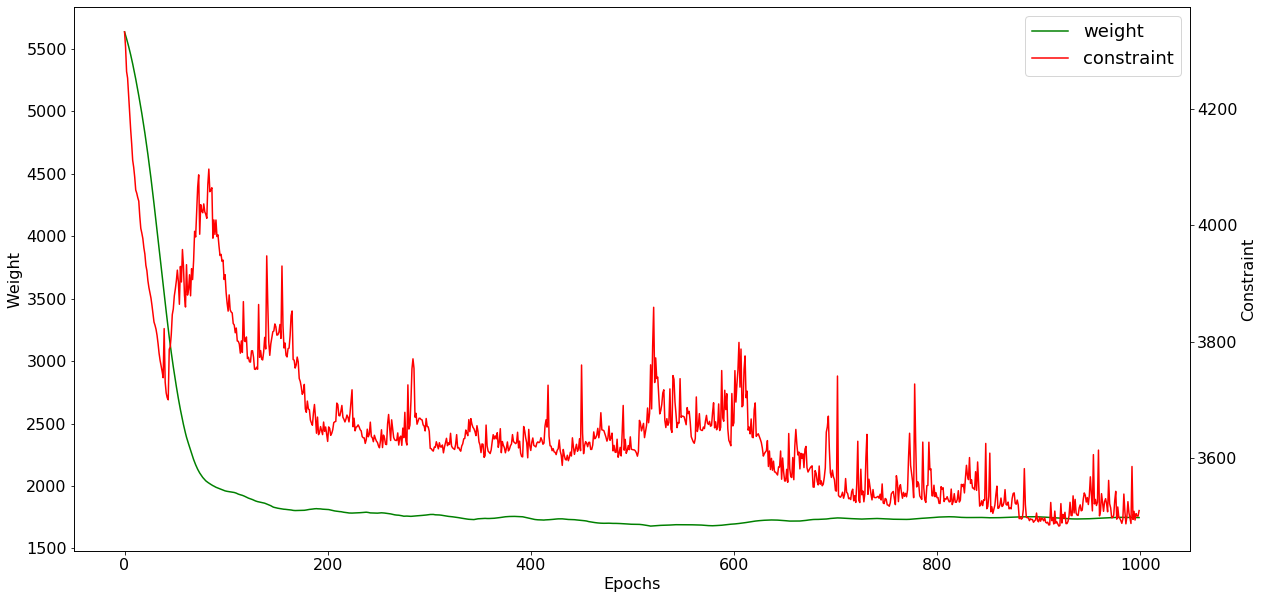

In [8]:
V = visual.Visual(data_path="data", plot=False)

V.constraint_weigth_plot()

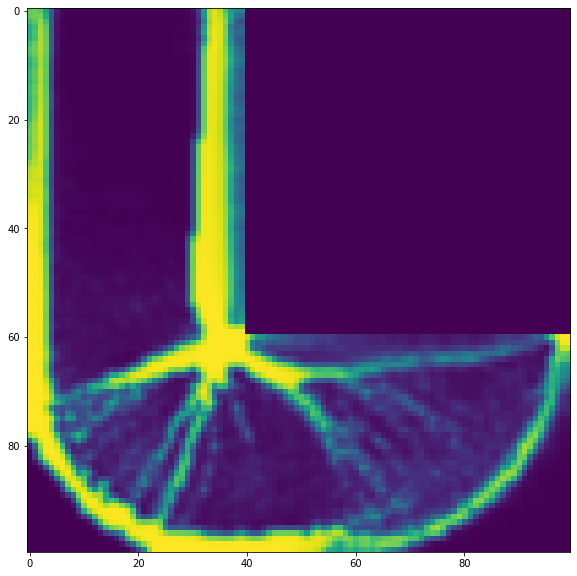

In [9]:
design_animation = V.animate(problem_size, mode="design")
HTML(design_animation.to_html5_video())

Circle Stress Condition
---

In [4]:
problem_size = 20
material_opt.main(
    problem_size=problem_size,
    elements=np.array([
        16 * np.square(problem_size) - problem_size * 2, 6399
    ]),
    directions=np.array([
        1,
        1
    ]),
    amplitudes=np.array([
        -1,
        -1
    ]),
    max_constraint=12000,
    
    mode="circle",
    
    smoothing_mode="gaussian", # gasssian or none
    smoothing_width=3.0,
    variance=1.0,
    
    penalty_mode="entropy", # entropy or none
    penalty_epochs=750, # Last x epochs uses penalty
    penalty_size=1.2,
    
    
    thickness=0.02,
    poisson_ratio=0.3,
    initial_value_design=2.0,
    elasticity_module=1000,
    
    barrier_size=2000,
    barrier_width=5000,
    
    epochs=1000,
    learning_rate=0.05,
    
    phis=[0.0, 0.5],
    kf=0.3,
    
    data_directory="data"
)


Initializing env: 1.2007062435150146 seconds
Instructions for updating:
Use tf.identity instead.
0: O: 5830.26416015625 W: 5637.1005859375 C 10184.12890625 -- T: 4.262606143951416
1: O: 5751.43310546875 W: 5609.83349609375 C 10136.703125 -- T: 3.0356290340423584
2: O: 5674.78955078125 W: 5581.3720703125 C 10091.26953125 -- T: 3.013185739517212
3: O: 5602.96337890625 W: 5551.69970703125 C 10050.6123046875 -- T: 3.0364720821380615
4: O: 5533.22607421875 W: 5520.83837890625 C 10012.349609375 -- T: 3.035565137863159
5: O: 5464.07568359375 W: 5488.9755859375 C 9974.9443359375 -- T: 3.01332688331604
6: O: 5400.03271484375 W: 5455.70751953125 C 9943.54296875 -- T: 3.0154409408569336
7: O: 5335.71728515625 W: 5421.11669921875 C 9912.7509765625 -- T: 3.044583797454834
8: O: 5272.0126953125 W: 5385.34716796875 C 9883.392578125 -- T: 3.030367136001587
9: O: 5210.7470703125 W: 5348.39501953125 C 9857.5048828125 -- T: 3.034392833709717
10: O: 5149.583984375 W: 5309.90869140625 C 9833.07421875 -- T:

94: O: 2215.473876953125 W: 2452.97998046875 C 9747.81640625 -- T: 3.013237476348877
95: O: 2208.864013671875 W: 2446.286865234375 C 9747.91015625 -- T: 3.027446985244751
96: O: 2195.451171875 W: 2439.897705078125 C 9739.9873046875 -- T: 3.0136632919311523
97: O: 2187.22119140625 W: 2433.53076171875 C 9737.880859375 -- T: 3.034576654434204
98: O: 2178.46923828125 W: 2427.2451171875 C 9735.08984375 -- T: 3.051211357116699
99: O: 2169.039306640625 W: 2420.8017578125 C 9731.705078125 -- T: 3.0330750942230225
100: O: 2158.99169921875 W: 2414.67333984375 C 9727.255859375 -- T: 3.0316545963287354
101: O: 2145.50341796875 W: 2408.560302734375 C 9718.859375 -- T: 3.020087957382202
102: O: 2133.4345703125 W: 2402.633056640625 C 9711.84375 -- T: 3.0433924198150635
103: O: 2128.3193359375 W: 2396.611083984375 C 9712.880859375 -- T: 3.0236423015594482
104: O: 2115.643310546875 W: 2390.64794921875 C 9705.19140625 -- T: 3.04891037940979
105: O: 2105.62841796875 W: 2384.6171875 C 9700.615234375 -- T:

189: O: 1677.42236328125 W: 2170.590087890625 C 9440.70703125 -- T: 3.0295164585113525
190: O: 1673.70703125 W: 2171.15966796875 C 9435.2177734375 -- T: 3.0099923610687256
191: O: 1671.062744140625 W: 2171.223876953125 C 9431.7421875 -- T: 3.026366949081421
192: O: 1666.75537109375 W: 2170.828369140625 C 9426.7138671875 -- T: 3.0199177265167236
193: O: 1665.1749267578125 W: 2170.27392578125 C 9425.3935546875 -- T: 3.043052911758423
194: O: 1663.800537109375 W: 2169.6708984375 C 9424.400390625 -- T: 3.040281295776367
195: O: 1659.65771484375 W: 2169.17138671875 C 9419.7041015625 -- T: 3.0404980182647705
196: O: 1658.527587890625 W: 2168.513671875 C 9419.0947265625 -- T: 3.0240070819854736
197: O: 1650.560791015625 W: 2167.980224609375 C 9409.484375 -- T: 3.0268514156341553
198: O: 1647.6795654296875 W: 2167.445556640625 C 9406.443359375 -- T: 3.0319700241088867
199: O: 1644.884521484375 W: 2167.03173828125 C 9403.353515625 -- T: 3.0136353969573975
200: O: 1641.3267822265625 W: 2166.5231

284: O: 3400.93701171875 W: 2023.815673828125 C 9389.796875 -- T: 3.0457420349121094
285: O: 3395.201171875 W: 2025.948974609375 C 9390.673828125 -- T: 3.0389404296875
286: O: 3384.63525390625 W: 2029.49658203125 C 9379.728515625 -- T: 3.026421546936035
287: O: 3380.44873046875 W: 2032.4072265625 C 9379.201171875 -- T: 3.041137218475342
288: O: 3410.7197265625 W: 2034.983642578125 C 9424.310546875 -- T: 3.032698631286621
289: O: 3355.81591796875 W: 2037.7381591796875 C 9356.419921875 -- T: 3.038820505142212
290: O: 3350.10693359375 W: 2040.50537109375 C 9353.3447265625 -- T: 3.0231072902679443
291: O: 3360.304443359375 W: 2042.8470458984375 C 9372.810546875 -- T: 3.0677244663238525
292: O: 3339.619140625 W: 2044.3486328125 C 9355.1806640625 -- T: 3.0341110229492188
293: O: 3328.133544921875 W: 2045.23046875 C 9350.951171875 -- T: 3.0468170642852783
294: O: 3324.71875 W: 2045.668212890625 C 9358.470703125 -- T: 3.044989824295044
295: O: 3761.599609375 W: 2046.089111328125 C 9886.5292968

380: O: 2784.062744140625 W: 2084.67041015625 C 9286.55078125 -- T: 3.051816463470459
381: O: 2820.17138671875 W: 2085.322998046875 C 9340.080078125 -- T: 3.0415046215057373
382: O: 2779.298828125 W: 2086.6171875 C 9286.8642578125 -- T: 3.051718235015869
383: O: 2776.489990234375 W: 2087.521240234375 C 9285.82421875 -- T: 3.036210775375366
384: O: 2771.609130859375 W: 2088.3583984375 C 9282.3359375 -- T: 3.04219913482666
385: O: 2774.12646484375 W: 2088.9619140625 C 9289.88671875 -- T: 3.031855821609497
386: O: 2773.366943359375 W: 2089.474365234375 C 9293.376953125 -- T: 3.026984214782715
387: O: 2759.53564453125 W: 2089.5126953125 C 9281.408203125 -- T: 3.0298829078674316
388: O: 2756.160400390625 W: 2089.498046875 C 9283.8427734375 -- T: 3.013948678970337
389: O: 2757.283203125 W: 2089.43896484375 C 9292.521484375 -- T: 3.033010721206665
390: O: 2750.07373046875 W: 2089.28759765625 C 9289.9365234375 -- T: 3.026588201522827
391: O: 2745.912841796875 W: 2089.173828125 C 9291.525390625

476: O: 2411.1533203125 W: 2107.05126953125 C 9218.404296875 -- T: 3.0279617309570312
477: O: 2395.209228515625 W: 2107.533935546875 C 9197.962890625 -- T: 3.042675733566284
478: O: 2398.884765625 W: 2107.8994140625 C 9205.46875 -- T: 3.0504655838012695
479: O: 2396.42626953125 W: 2108.25341796875 C 9204.7783203125 -- T: 3.051243305206299
480: O: 2393.6767578125 W: 2108.515380859375 C 9203.9287109375 -- T: 3.041347026824951
481: O: 2393.65283203125 W: 2108.76953125 C 9207.15234375 -- T: 3.0327236652374268
482: O: 2389.91650390625 W: 2108.9638671875 C 9205.3994140625 -- T: 3.056095838546753
483: O: 2386.53857421875 W: 2109.759033203125 C 9202.078125 -- T: 3.059014320373535
484: O: 2381.68359375 W: 2110.484130859375 C 9196.87109375 -- T: 3.031221866607666
485: O: 2378.6923828125 W: 2111.087890625 C 9194.7421875 -- T: 3.043696403503418
486: O: 2375.82666015625 W: 2111.654541015625 C 9193.0810546875 -- T: 3.054827928543091
487: O: 2373.01513671875 W: 2112.068115234375 C 9191.95703125 -- T:

572: O: 2180.644775390625 W: 2124.6376953125 C 9165.6767578125 -- T: 3.032792091369629
573: O: 2176.73779296875 W: 2124.62353515625 C 9162.748046875 -- T: 3.0503182411193848
574: O: 2176.38427734375 W: 2124.626220703125 C 9164.9404296875 -- T: 3.0435709953308105
575: O: 2174.9091796875 W: 2124.646728515625 C 9165.60546875 -- T: 3.059300184249878
576: O: 2172.09619140625 W: 2124.67919921875 C 9164.421875 -- T: 3.0337085723876953
577: O: 2170.283447265625 W: 2124.720703125 C 9164.671875 -- T: 3.02864933013916
578: O: 2164.990234375 W: 2124.650146484375 C 9160.30078125 -- T: 3.0340657234191895
579: O: 2163.806396484375 W: 2124.486083984375 C 9162.0166015625 -- T: 3.044656276702881
580: O: 2157.859130859375 W: 2124.24853515625 C 9157.16796875 -- T: 3.0521156787872314
581: O: 2162.17626953125 W: 2124.03076171875 C 9166.875 -- T: 3.0536625385284424
582: O: 2155.36767578125 W: 2123.856201171875 C 9160.6484375 -- T: 3.0274388790130615
583: O: 2156.685302734375 W: 2123.72314453125 C 9165.824218

668: O: 1972.990234375 W: 2124.408447265625 C 9096.662109375 -- T: 3.0633890628814697
669: O: 1974.6075439453125 W: 2124.2109375 C 9101.84375 -- T: 3.0636630058288574
670: O: 1987.615966796875 W: 2124.20166015625 C 9122.3828125 -- T: 3.047823667526245
671: O: 1979.9951171875 W: 2124.349853515625 C 9112.6318359375 -- T: 3.0405235290527344
672: O: 1973.745849609375 W: 2124.59130859375 C 9104.4091796875 -- T: 3.03303599357605
673: O: 1972.02734375 W: 2124.79736328125 C 9102.8671875 -- T: 3.0320961475372314
674: O: 1969.907958984375 W: 2124.97509765625 C 9100.990234375 -- T: 3.0467050075531006
675: O: 2113.684814453125 W: 2125.08251953125 C 9303.2900390625 -- T: 3.0514113903045654
676: O: 1968.2593994140625 W: 2125.21337890625 C 9101.5146484375 -- T: 3.032022476196289
677: O: 1968.7542724609375 W: 2125.343994140625 C 9103.919921875 -- T: 3.0617949962615967
678: O: 1965.064697265625 W: 2125.43505859375 C 9100.357421875 -- T: 3.031611204147339
679: O: 1965.90234375 W: 2125.51171875 C 9103.44

763: O: 1852.6160888671875 W: 2129.53759765625 C 9071.3837890625 -- T: 3.0313429832458496
764: O: 1848.550537109375 W: 2129.605224609375 C 9066.341796875 -- T: 3.030928134918213
765: O: 1850.595703125 W: 2129.6240234375 C 9070.654296875 -- T: 3.061361789703369
766: O: 1853.0692138671875 W: 2129.62255859375 C 9075.6875 -- T: 3.0316147804260254
767: O: 1850.78466796875 W: 2129.62353515625 C 9073.7421875 -- T: 3.039794445037842
768: O: 1848.1502685546875 W: 2129.60205078125 C 9071.4912109375 -- T: 3.0343854427337646
769: O: 1846.656982421875 W: 2129.568115234375 C 9070.9296875 -- T: 3.0458903312683105
770: O: 1852.4427490234375 W: 2129.51806640625 C 9080.82421875 -- T: 3.0515875816345215
771: O: 1842.95751953125 W: 2129.52685546875 C 9068.359375 -- T: 3.036423921585083
772: O: 1845.0 W: 2129.505615234375 C 9072.693359375 -- T: 3.027693033218384
773: O: 1841.513671875 W: 2129.459716796875 C 9069.150390625 -- T: 3.040590763092041
774: O: 1839.65087890625 W: 2129.375 C 9067.978515625 -- T: 3

859: O: 1776.9451904296875 W: 2129.994873046875 C 9076.02734375 -- T: 3.036064386367798
860: O: 1771.885498046875 W: 2130.24951171875 C 9068.310546875 -- T: 3.0591824054718018
861: O: 1770.0870361328125 W: 2130.5546875 C 9065.14453125 -- T: 3.0549747943878174
862: O: 1762.7872314453125 W: 2130.90966796875 C 9053.8564453125 -- T: 3.0329434871673584
863: O: 1759.0830078125 W: 2131.327880859375 C 9047.373046875 -- T: 3.0401575565338135
864: O: 1759.9644775390625 W: 2131.695556640625 C 9048.0302734375 -- T: 3.0615711212158203
865: O: 1764.038330078125 W: 2132.02099609375 C 9053.5546875 -- T: 3.0318410396575928
866: O: 1766.4688720703125 W: 2132.3310546875 C 9056.7431640625 -- T: 3.03804349899292
867: O: 1761.77197265625 W: 2132.5771484375 C 9049.685546875 -- T: 3.030874013900757
868: O: 1763.1031494140625 W: 2132.787353515625 C 9051.603515625 -- T: 3.0503838062286377
869: O: 1763.4375 W: 2132.97265625 C 9052.2080078125 -- T: 3.0371816158294678
870: O: 1761.18408203125 W: 2133.12109375 C 90

954: O: 1700.286865234375 W: 2132.60791015625 C 9039.84765625 -- T: 3.0459306240081787
955: O: 1698.6395263671875 W: 2132.57373046875 C 9038.521484375 -- T: 3.048785924911499
956: O: 1736.0377197265625 W: 2132.5224609375 C 9094.4365234375 -- T: 3.031153917312622
957: O: 1696.9749755859375 W: 2132.4912109375 C 9038.482421875 -- T: 3.039524555206299
958: O: 1693.8416748046875 W: 2132.515625 C 9034.48046875 -- T: 3.0297982692718506
959: O: 1698.4326171875 W: 2132.526611328125 C 9042.228515625 -- T: 3.0296764373779297
960: O: 1695.3795166015625 W: 2132.526611328125 C 9038.55859375 -- T: 3.04154372215271
961: O: 1696.395263671875 W: 2132.53857421875 C 9041.119140625 -- T: 3.0526623725891113
962: O: 1696.672607421875 W: 2132.53857421875 C 9042.4375 -- T: 3.039653778076172
963: O: 1701.619140625 W: 2132.5927734375 C 9050.123046875 -- T: 3.029824733734131
964: O: 1696.2127685546875 W: 2132.687255859375 C 9042.66015625 -- T: 3.055262327194214
965: O: 1695.864013671875 W: 2132.760986328125 C 904

Circle Result
---

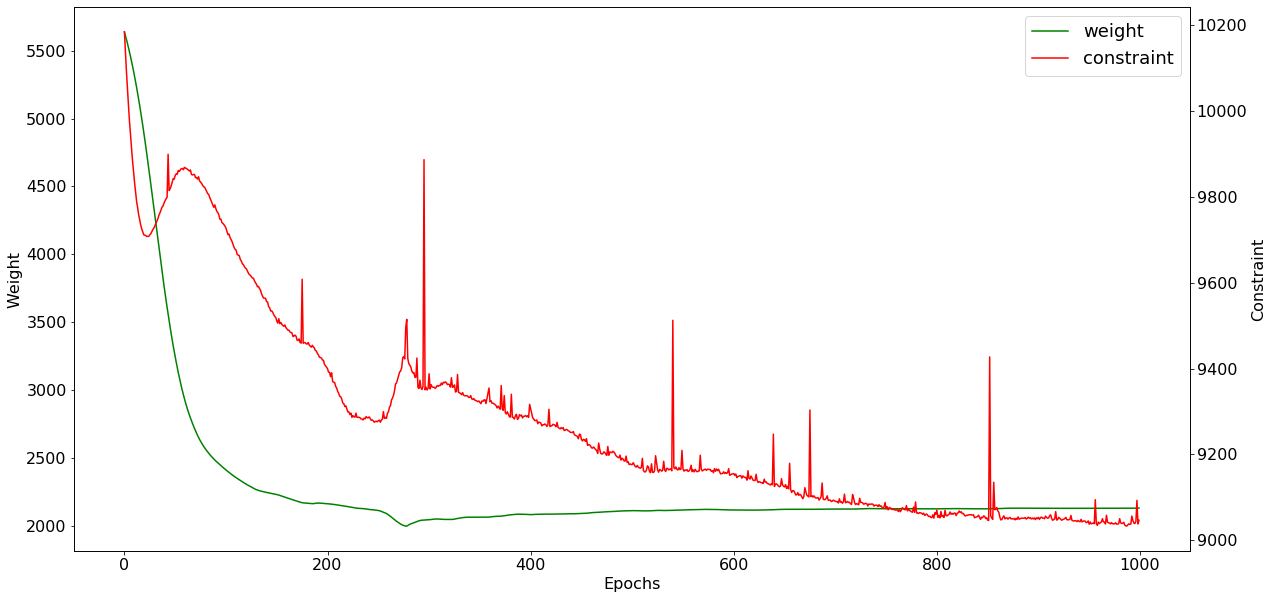

In [5]:
V = visual.Visual(data_path="data", plot=False)

V.constraint_weigth_plot()

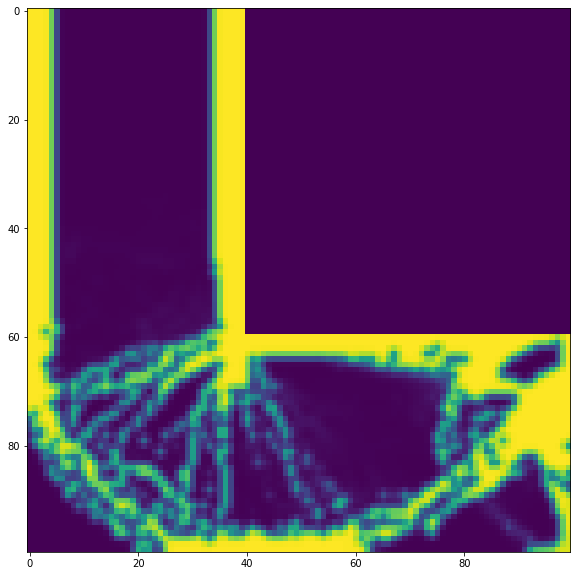

In [6]:
design_animation = V.animate(problem_size, mode="design")
HTML(design_animation.to_html5_video())